<a href="https://colab.research.google.com/github/vestinabert/Image_Quality_Assessment/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving italijoskelione011.jpg to italijoskelione011.jpg


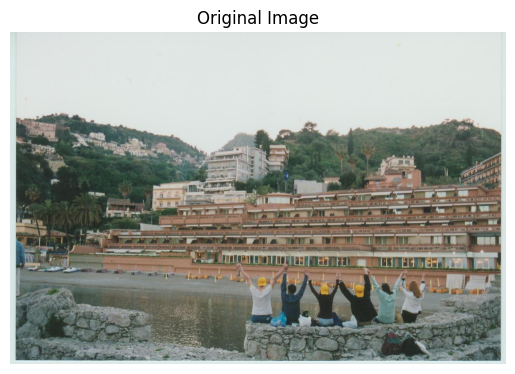

In [3]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Read the uploaded image
for filename in uploaded.keys():
    image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct visualization

# Display the original image
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


Vaizdo duomenys buvo sėkmingai įkelti į Google Colab aplinką naudojant files.upload(). Šis procesas užtikrino, kad vaizdas būtų pasiekiamas tolimesniam apdorojimui. Spalvoti vaizdai buvo konvertuoti į RGB formatą, siekiant išvengti spalvų iškraipymų vizualizacijos metu.

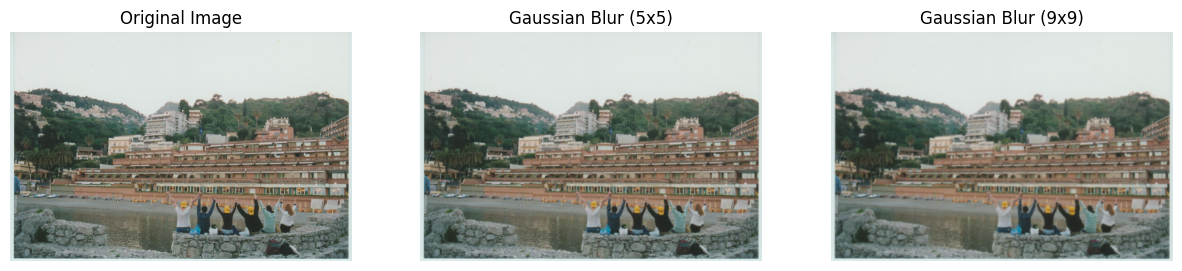

In [4]:
def apply_gaussian_blur(image, kernel_size):
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return blurred

# Apply Gaussian Blur with different kernel sizes
blurred_5 = apply_gaussian_blur(image, 5)
blurred_9 = apply_gaussian_blur(image, 9)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(blurred_5)
axes[1].set_title("Gaussian Blur (5x5)")
axes[2].imshow(blurred_9)
axes[2].set_title("Gaussian Blur (9x9)")

for ax in axes:
    ax.axis("off")

plt.show()


Vaizdo triukšmui sumažinti buvo taikomas cv2.GaussianBlur() filtras, naudojant skirtingus branduolio dydžius – (5,5) ir (9,9). Pastebėta, kad mažesnio branduolio dydžio (5,5) filtras išsaugo daugiau smulkių vaizdo detalių, tuo tarpu didesnio branduolio dydžio (9,9) filtras efektyviau sumažina triukšmą, tačiau taip pat sukelia vaizdo detalumo sumažėjimą. Šis metodas yra tinkamas triukšmingų vaizdų išlyginimui, tačiau gali sukelti ryškumo praradimą.

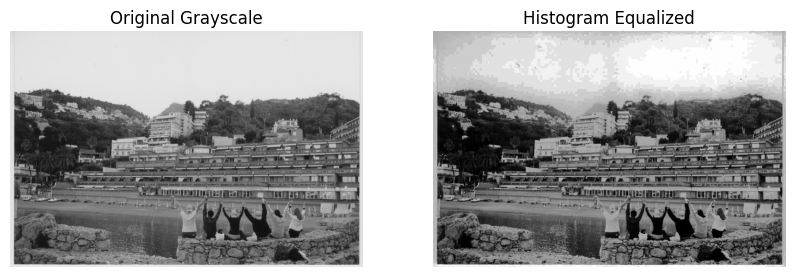

In [5]:
def equalize_histogram(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(gray)
    return equalized

# Apply histogram equalization
equalized = equalize_histogram(image)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap="gray")
axes[0].set_title("Original Grayscale")
axes[1].imshow(equalized, cmap="gray")
axes[1].set_title("Histogram Equalized")

for ax in axes:
    ax.axis("off")

plt.show()


Vaizdo kontrastui pagerinti buvo naudojamas cv2.equalizeHist() metodas, taikomas pilkosios skalės vaizdui. Eksperimentai parodė, kad histogramų išlyginimas žymiai pagerina detalių matomumą tamsiose ir šviesiose vaizdo srityse, ypač esant prastam pradinių vaizdų dinaminio diapazono pasiskirstymui. Tačiau kai kuriais atvejais gali atsirasti pernelyg ryškūs perėjimai, kurie lemia nenatūralų vaizdo atvaizdavimą.

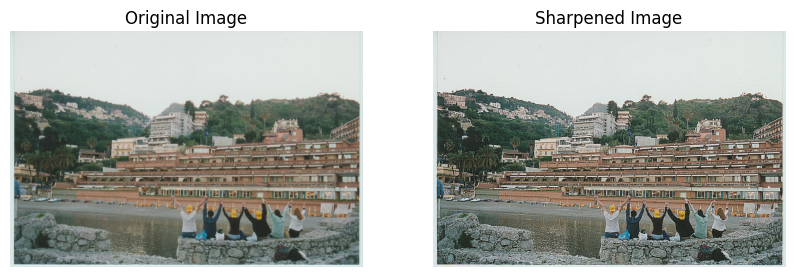

In [6]:
def apply_sharpening(image):
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1, 9, -1],
                                  [-1, -1, -1]])
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)
    return sharpened

# Apply sharpening
sharpened = apply_sharpening(image)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(sharpened)
axes[1].set_title("Sharpened Image")

for ax in axes:
    ax.axis("off")

plt.show()


Vaizdo aštrumo gerinimui buvo naudojamas cv2.filter2D() su aukšto dažnio branduoliu. Rezultatai parodė, kad ši technika veiksmingai sustiprina vaizdo kontūrus ir smulkias detales, todėl objektai tampa ryškesni ir lengviau atskiriami. Tačiau pastebėta, kad ši metodika gali padidinti triukšmo intensyvumą vaizduose, kuriuose jau yra artefaktų ar didelis kontrastas. Ši filtravimo technika yra ypač naudinga tais atvejais, kai būtina išryškinti vaizdo briaunas.

In [7]:
!pip install -q transformers diffusers

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

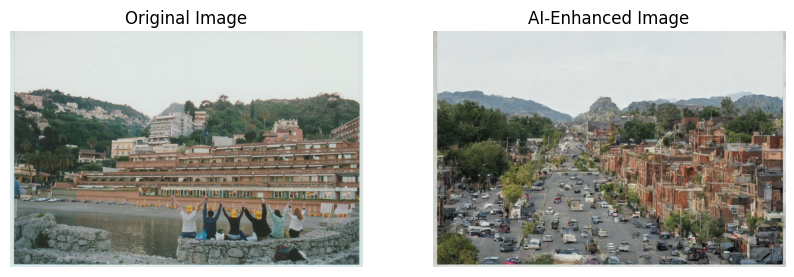

In [8]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch

# Load the model
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Use GPU if available

# Convert image to PIL format
image_pil = Image.fromarray(image)

# Apply generative model transformation
prompt = "A high-quality version of this image"
generated_image = pipe(prompt=prompt, image=image_pil, strength=0.75).images[0]

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(generated_image)
axes[1].set_title("AI-Enhanced Image")

for ax in axes:
    ax.axis("off")

plt.show()


Šios kodo eilutės įkelia ir paleidžia Stable Diffusion Image-to-Image generatyvųjį modelį iš Hugging Face Diffusers bibliotekos. Modelis yra užkraunamas į atmintį su pusės precizijos (float16) formatu, siekiant sumažinti naudojamos atminties kiekį. Jei prieinama NVIDIA GPU, modelis perkeliama į CUDA, kad būtų užtikrintas greitesnis apdorojimas. Tuomet įkeliamas pradinis vaizdas, konvertuojamas į PIL formatą, ir jam pritaikomas teksto pagrindu sugeneruotas transformavimas su strength=0.75, kas reiškia, jog generuotas rezultatas yra 75% perdirbtas, o 25% vis dar išlaiko originalaus vaizdo struktūrą.

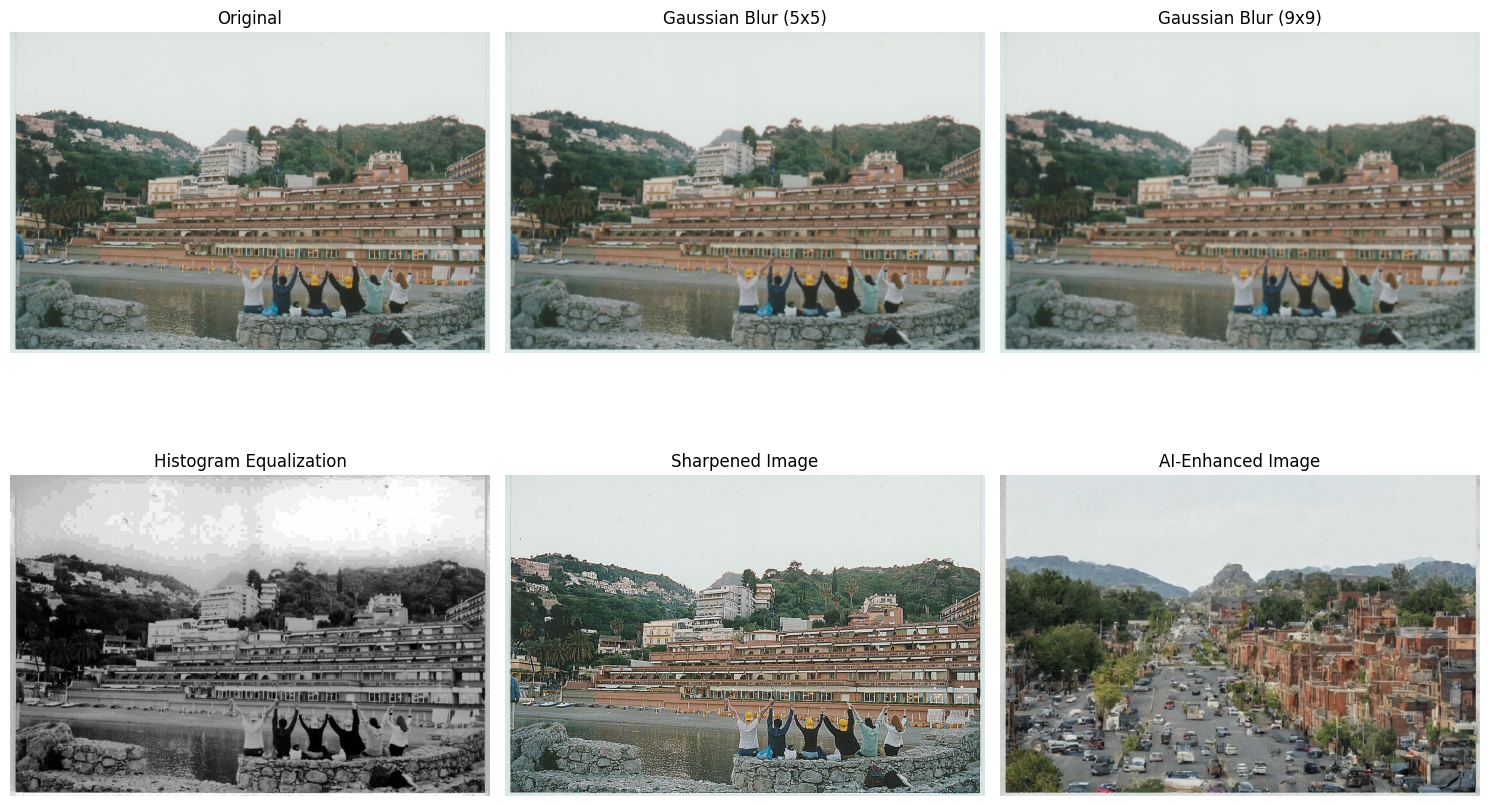

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image)
axes[0, 0].set_title("Original")

axes[0, 1].imshow(blurred_5)
axes[0, 1].set_title("Gaussian Blur (5x5)")

axes[0, 2].imshow(blurred_9)
axes[0, 2].set_title("Gaussian Blur (9x9)")

axes[1, 0].imshow(equalized, cmap="gray")
axes[1, 0].set_title("Histogram Equalization")

axes[1, 1].imshow(sharpened)
axes[1, 1].set_title("Sharpened Image")

axes[1, 2].imshow(generated_image)
axes[1, 2].set_title("AI-Enhanced Image")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()
